# Importing necessary libraries 

In [6]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [2]:
data=pd.read_csv("survey.csv")

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# EDA

In [4]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [7]:
data.describe()


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


C:\Users\apurv\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\apurv\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\apurv\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

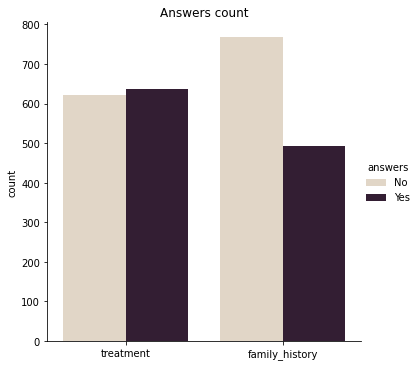

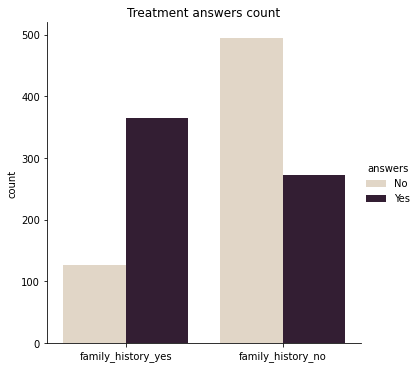

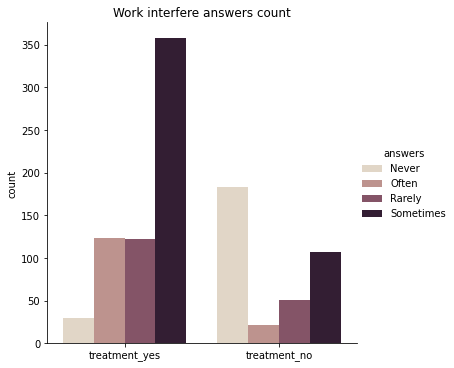

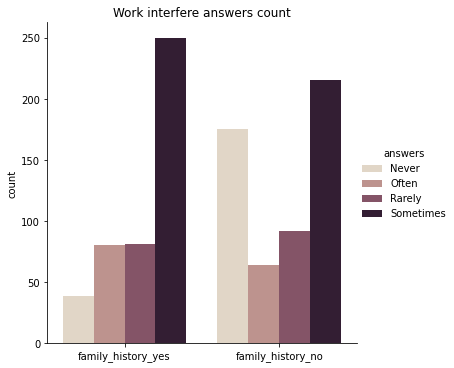

In [8]:
treatment_values = data.treatment.value_counts().to_frame()
family_history_values = data.family_history.value_counts().to_frame()
plot_frame = pd.DataFrame({'answers': ['No', 'Yes'], 'treatment': treatment_values['treatment'], 'family_history': family_history_values['family_history']})
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment", value_name="family_history")
sns.factorplot(x='treatment', y='family_history', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Answers count')

treatment_values_yes = data.treatment.loc[data.family_history == 'Yes'].value_counts().to_frame()
treatment_values_no = data.treatment.loc[data.family_history == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': treatment_values_yes['treatment'], 'family_history_no': treatment_values_no['treatment']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Treatment answers count')

work_interfere_yes = data.work_interfere.loc[data.treatment == 'Yes'].value_counts().to_frame()
work_interfere_no = data.work_interfere.loc[data.treatment == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'treatment_yes': work_interfere_yes['work_interfere'], 'treatment_no': work_interfere_no['work_interfere']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_yes", value_name="treatment_no")
sns.factorplot(x='treatment_yes', y='treatment_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')

work_interfere_yes = data.work_interfere.loc[data.family_history == 'Yes'].value_counts().to_frame()
work_interfere_no = data.work_interfere.loc[data.family_history == 'No'].value_counts().to_frame()
plot_frame = pd.DataFrame({'family_history_yes': work_interfere_yes['work_interfere'], 'family_history_no': work_interfere_no['work_interfere']})
plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="family_history_yes", value_name="family_history_no")
sns.factorplot(x='family_history_yes', y='family_history_no', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Work interfere answers count')

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


C:\Users\apurv\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


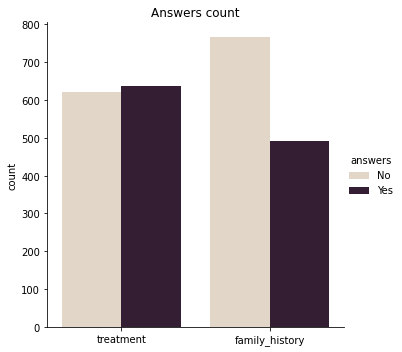

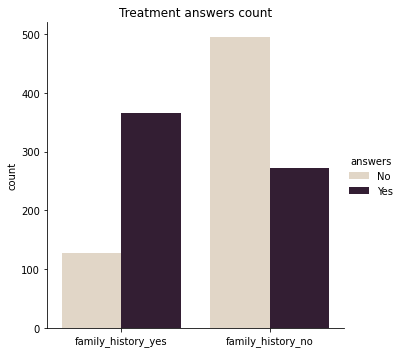

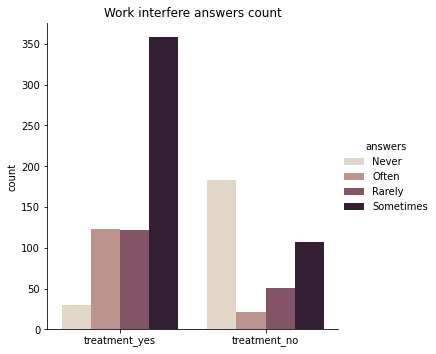

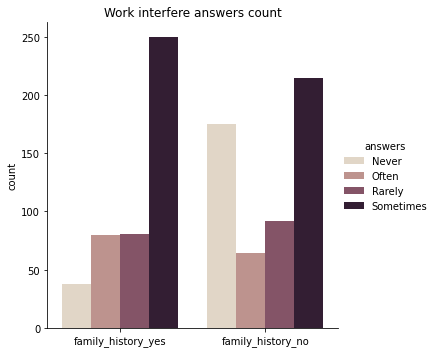

In [11]:
# clean "Gender" column

data.Gender = data.Gender.str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", 
         "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]

data.Gender.loc[data.Gender.isin(male)] = 'male'
data.Gender.loc[data.Gender.isin(female)] = 'female'
data.Gender.loc[data.Gender.isin(other)] = 'others'

gender_values = data.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient
table_gender

C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<bound method Styler.background_gradient of <pandas.io.formats.style.Styler object at 0x000001DD2DA9FFC8>>

In [12]:
from sklearn.ensemble import IsolationForest


def winsorization_outliers(df):
    out=[]
    for i in df:
        q1 = np.percentile(df , 1)
        q3 = np.percentile(df , 99)
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
    return out
    
outliers = winsorization_outliers(data.Age)

Outliers: [18, 18, 18, -29, 18, 18, 60, 329, 99999999999, 57, 58, 57, 18, 18, 62, 65, 57, -1726, 5, 61, 8, 11, -1, 72, 60]


In [28]:
pip install -U seaborn


  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


C:\Users\apurv\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



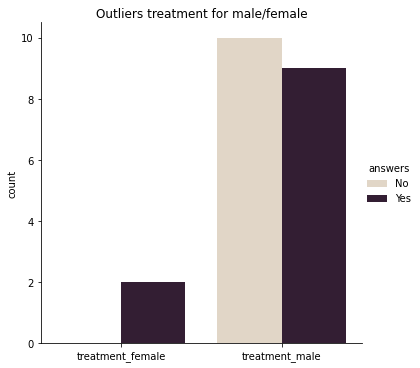

In [14]:
data_outliers = data.loc[data.Age.isin(outliers)]

treatment_female = data_outliers.treatment.loc[data_outliers.Gender == 'female'].value_counts().to_frame()
treatment_male = data_outliers.treatment.loc[data_outliers.Gender == 'male'].value_counts().to_frame()

plot_frame = pd.DataFrame({'treatment_female': treatment_female['treatment'], 'treatment_male': treatment_male['treatment']})

plot_frame.index.name = 'answers'
plot_frame.reset_index(inplace=True)
plot_frame = pd.melt(plot_frame, id_vars='answers', var_name="treatment_female", value_name="treatment_male")
sns.factorplot(x='treatment_female', y='treatment_male', hue='answers', data=plot_frame, kind='bar',  palette="ch:.25").set(ylabel='count', xlabel='', title='Outliers treatment for male/female')

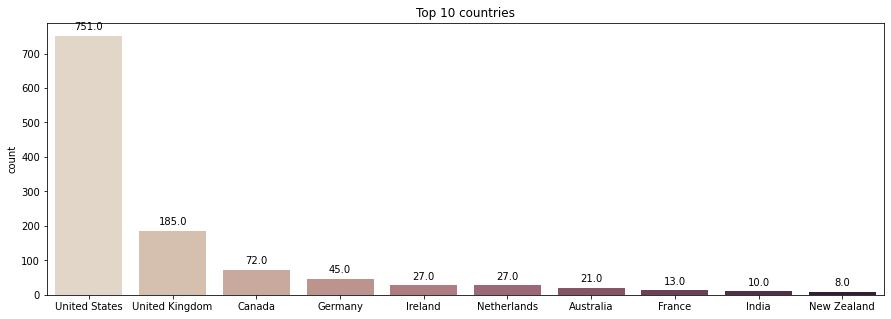

In [15]:
country_count = data.Country.value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'Country': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 countries')

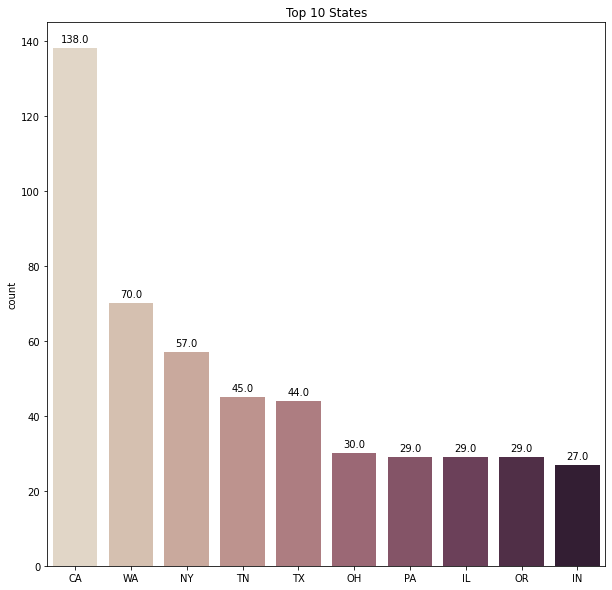

In [18]:
state_count = data.state.value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'state': 'count'})
plt.figure(figsize=(10,10))
ax = sns.barplot(x=state_count.index, y='count', data=state_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 States')

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.Country.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.Country.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Country and trearment",
   
    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'Yes'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes"),
              1, 1)
fig.add_trace(go.Pie(labels=data.state.loc[data.treatment == 'No'].value_counts().index.to_list()[:10], values = data.state.loc[data.treatment == 'No'].value_counts()[:10], name="Treatment - No"),
              1, 2)



fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State and trearment",
   
    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [21]:
import plotly.express as px


fig = px.parallel_categories(data[['treatment', 'obs_consequence', 'family_history',  
                                   'work_interfere']])
fig.show()

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
#from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split


# Data Cleaning

In [26]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
data =data.drop(['comments'], axis= 1)
data = data.drop(['state'], axis= 1)
data = data.drop(['Timestamp'], axis= 1)

data.isnull().sum().max() #just checking that there's no missing data missing...
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [29]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in data:
    if feature in intFeatures:
        data[feature] = data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data[feature] = data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data[feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [32]:
#clean 'Gender'
#Slower case all columm's elements
gender = data['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = data['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'others']


In [35]:
#complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

#Ranges of Age
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [36]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

data['work_interfere'] = data['work_interfere'].replace([defaultString], 'Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# Encoded data

In [37]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
data = data.drop(['Country'], axis= 1)
data.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'others']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometim

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [38]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0  

# Scaling and fitting

In [39]:
# Scaling Age
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [51]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

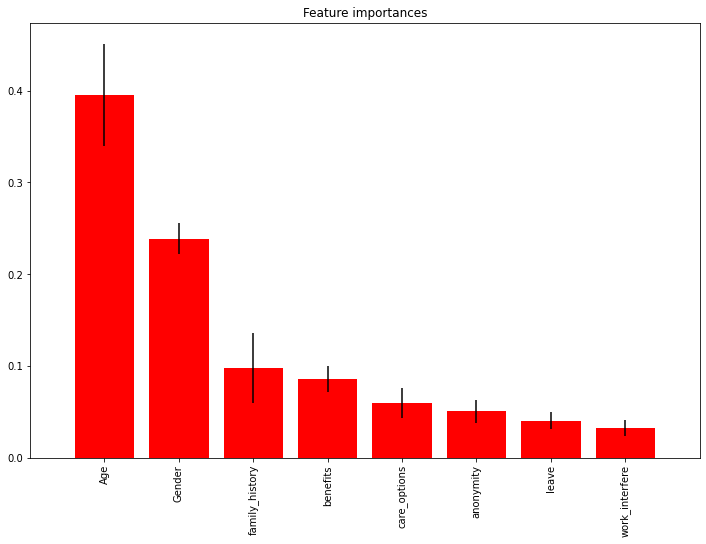

In [52]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

# Tuning

In [53]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
     # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    return accuracy

In [54]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [55]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [56]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [57]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

# Evaluating models

In [58]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



########### Logistic Regression ###############
Accuracy: 0.7883597883597884
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0]


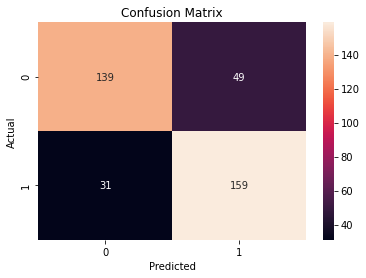

Classification Accuracy: 0.7883597883597884
Classification Error: 0.21164021164021163
False Positive Rate: 0.26063829787234044
Precision: 0.7644230769230769
AUC Score: 0.7881019036954088


C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\apurv\Anaconda3\lib\site-packages\sk

Cross-validated AUC: 0.8751658106118791
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.0901746  0.9098254 ]
 [0.95109989 0.04890011]
 [0.95770968 0.04229032]
 [0.15002471 0.84997529]
 [0.39433644 0.60566356]
 [0.06325495 0.93674505]
 [0.78120501 0.21879499]
 [0.21553531 0.78446469]
 [0.61696081 0.38303919]
 [0.53404475 0.46595525]]
First 10 predicted probabilities:
 [[0.9098254 ]
 [0.04890011]
 [0.04229032]
 [0.84997529]
 [0.60566356]
 [0.93674505]
 [0.21879499]
 [0.78446469]
 [0.38303919]
 [0.46595525]]


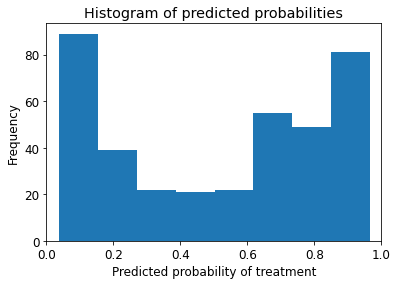

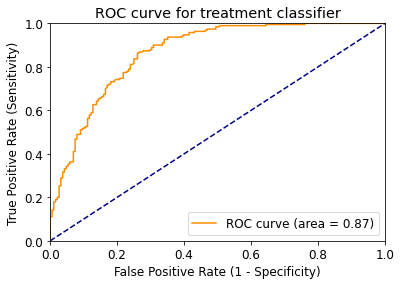

[[139  49]
 [ 31 159]]


In [59]:
logisticRegression()


In [60]:
from sklearn.model_selection import RandomizedSearchCV


In [61]:
from sklearn import svm, grid_search, datasets


ImportError: cannot import name 'grid_search' from 'sklearn' (C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [62]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    RandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

########### KNeighborsClassifier ###############
Accuracy: 0.8068783068783069
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


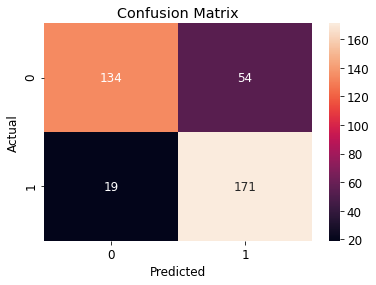

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.2872340425531915
Precision: 0.76
AUC Score: 0.8063829787234043
Cross-validated AUC: 0.8790522593445982
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.22222222 0.77777778]
 [0.33333333 0.66666667]
 [0.07407407 0.92592593]
 [0.59259259 0.40740741]
 [0.2962963  0.7037037 ]
 [0.37037037 0.62962963]
 [0.37037037 0.62962963]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.77777778]
 [0.66666667]
 [0.92592593]
 [0.40740741]
 [0.7037037 ]
 [0.62962963]
 [0.62962963]]


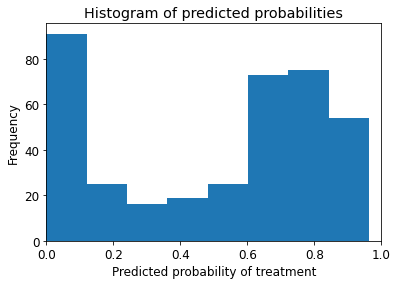

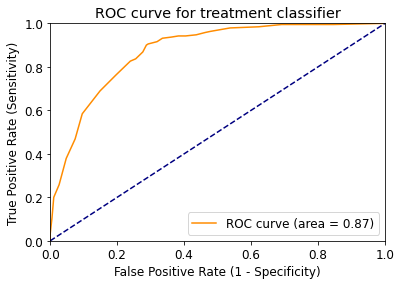

[[134  54]
 [ 19 171]]


In [63]:
Knn()


In [64]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    RandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

########### Tree classifier ###############
Accuracy: 0.8095238095238095
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


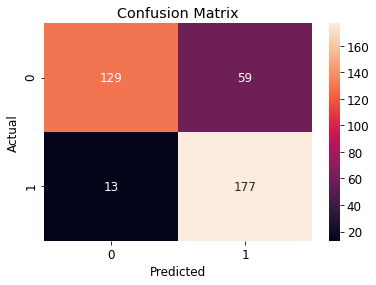

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.31382978723404253
Precision: 0.75
AUC Score: 0.8088745800671893
Cross-validated AUC: 0.8817868343573988
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.16111111 0.83888889]
 [0.98496241 0.01503759]
 [0.98496241 0.01503759]
 [0.07207207 0.92792793]
 [0.39877301 0.60122699]
 [0.16111111 0.83888889]
 [0.90598291 0.09401709]
 [0.39877301 0.60122699]
 [0.19565217 0.80434783]
 [0.19565217 0.80434783]]
First 10 predicted probabilities:
 [[0.83888889]
 [0.01503759]
 [0.01503759]
 [0.92792793]
 [0.60122699]
 [0.83888889]
 [0.09401709]
 [0.60122699]
 [0.80434783]
 [0.80434783]]


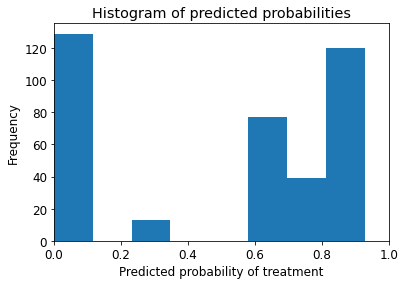

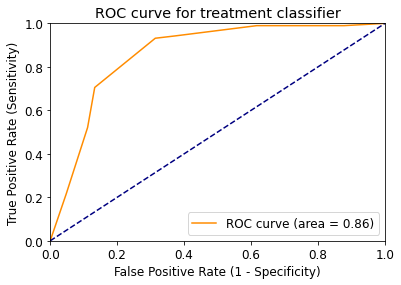

[[129  59]
 [ 13 177]]


In [65]:
treeClassifier()


In [66]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    RandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100


########### Random Forests ###############
Accuracy: 0.8148148148148148
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


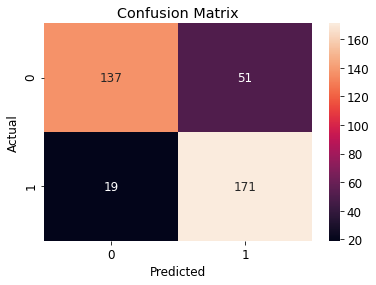

Classification Accuracy: 0.8148148148148148
Classification Error: 0.18518518518518523
False Positive Rate: 0.2712765957446808
Precision: 0.7702702702702703
AUC Score: 0.8143617021276596
Cross-validated AUC: 0.8963543666794674
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2246278  0.7753722 ]
 [0.94452767 0.05547233]
 [0.95466064 0.04533936]
 [0.18349448 0.81650552]
 [0.49976232 0.50023768]
 [0.20037967 0.79962033]
 [0.77594221 0.22405779]
 [0.33839784 0.66160216]
 [0.27828472 0.72171528]
 [0.23622232 0.76377768]]
First 10 predicted probabilities:
 [[0.7753722 ]
 [0.05547233]
 [0.04533936]
 [0.81650552]
 [0.50023768]
 [0.79962033]
 [0.22405779]
 [0.66160216]
 [0.72171528]
 [0.76377768]]


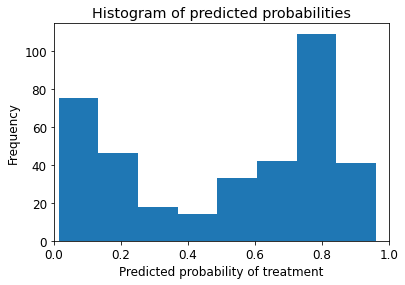

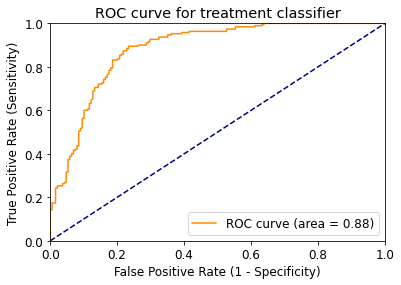

[[137  51]
 [ 19 171]]


In [67]:
randomForest()


In [68]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100


########### Bagging ###############
Accuracy: 0.7592592592592593
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0]


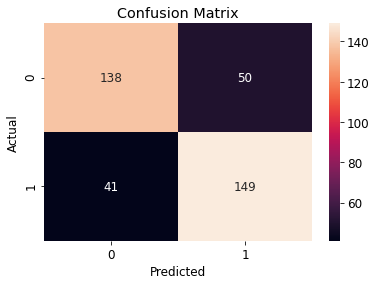

Classification Accuracy: 0.7592592592592593
Classification Error: 0.2407407407407407
False Positive Rate: 0.26595744680851063
Precision: 0.7487437185929648
AUC Score: 0.7591265397536393
Cross-validated AUC: 0.8458881368407578
First 10 predicted responses:
 [1 0 0 1 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.11666667 0.88333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.6        0.4       ]
 [0.1        0.9       ]
 [1.         0.        ]
 [0.3        0.7       ]
 [0.         1.        ]
 [0.2        0.8       ]]
First 10 predicted probabilities:
 [[0.88333333]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.4       ]
 [0.9       ]
 [0.        ]
 [0.7       ]
 [1.        ]
 [0.8       ]]


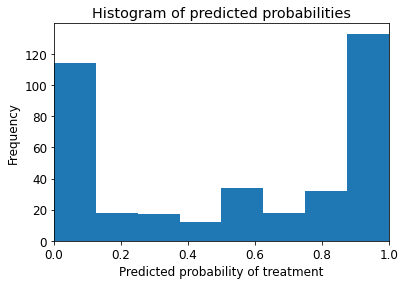

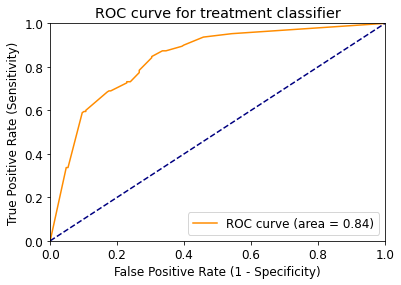

[[138  50]
 [ 41 149]]


In [69]:
bagging()


In [70]:
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.8201058201058201
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


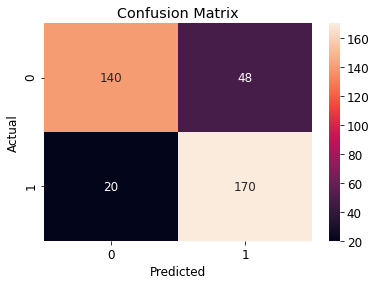

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.2553191489361702
Precision: 0.7798165137614679
AUC Score: 0.8197088465845466
Cross-validated AUC: 0.8744717661930362
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49893899 0.50106101]
 [0.50264986 0.49735014]
 [0.50277002 0.49722998]
 [0.49870031 0.50129969]
 [0.49997205 0.50002795]
 [0.49827203 0.50172797]
 [0.50073177 0.49926823]
 [0.4996408  0.5003592 ]
 [0.49938195 0.50061805]
 [0.49918712 0.50081288]]
First 10 predicted probabilities:
 [[0.50106101]
 [0.49735014]
 [0.49722998]
 [0.50129969]
 [0.50002795]
 [0.50172797]
 [0.49926823]
 [0.5003592 ]
 [0.50061805]
 [0.50081288]]


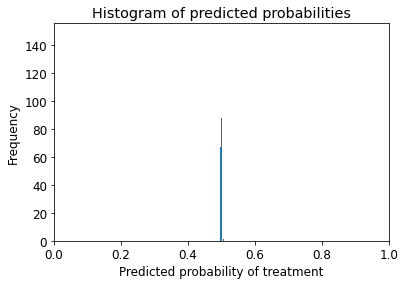

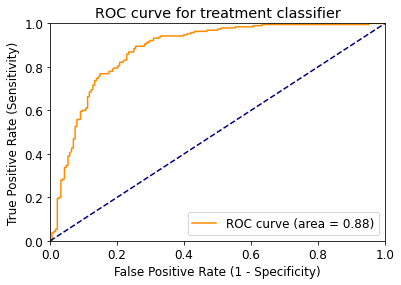

[[140  48]
 [ 20 170]]


In [71]:
boosting()
